In [1]:
import tensorflow as tf
import tensorflow
!pip install keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load Dataset

In [2]:
(X_train, y_train) ,(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

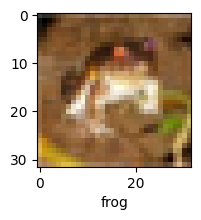

In [8]:
plot_sample(X_train, y_train,0)

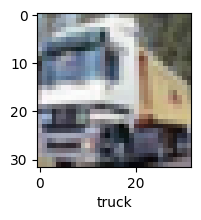

In [9]:
plot_sample(X_train, y_train,1)

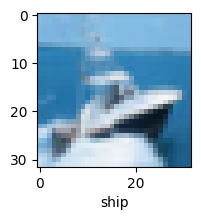

In [10]:
plot_sample(X_train, y_train,8)

In [11]:
#making the image susceptible or in the range of 0-1
X_train = X_train/255
X_test = X_test/255

In [12]:
#creating an Artificial Neural Network

ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'), #having 3000 neurons
    layers.Dense(1000, activation = 'relu'), #having 1000 neurons
    layers.Dense(1000, activation = 'sigmoid') #having 10 categories
])

ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 8ms/step - loss: 1.9573 - accuracy: 0.3093
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6903 - accuracy: 0.4029
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5967 - accuracy: 0.4359
Epoch 4/5
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5330 - accuracy: 0.4575
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4822 - accuracy: 0.4771


In [13]:
import sklearn.metrics
!pip install scikit-learn
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

confusion = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix: \n", confusion)
print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 1s 2ms/step
Confusion Matrix: 
 [[541  61  18   7 102  14  21  17 189  30]
 [ 50 756   5   7  33  17  12  12  54  54]
 [ 99  48 127  58 395  81 114  27  39  12]
 [ 53  97  45 223 210 152 125  21  36  38]
 [ 55  32  29  21 659  45  90  19  42   8]
 [ 89  77  76 160 211 225  76  33  33  20]
 [ 17  49  31  66 249  54 493   7  21  13]
 [ 62  59  27  47 293  70  32 326  22  62]
 [147 143   2  17  44  15   9   8 587  28]
 [ 60 403   2  18  34  17  26  21  78 341]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.54      0.50      1000
           1       0.44      0.76      0.55      1000
           2       0.35      0.13      0.19      1000
           3       0.36      0.22      0.27      1000
           4       0.30      0.66      0.41      1000
           5       0.33      0.23      0.27      1000
           6       0.49      0.49      0.49      1000
           7       0.66      0.33   

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

cnn = keras.models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Using softmax for classification
])


In [15]:
cnn.compile(optimizer ='adam',
           loss ='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 4ms/step - loss: 2.3188 - accuracy: 0.0946


[2.318753242492676, 0.09459999948740005]

In [17]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

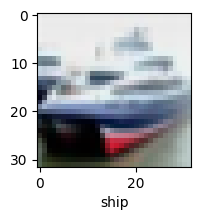

In [18]:
plot_sample(X_test, y_test,1)

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[0.07634296, 0.12973839, 0.10093571, 0.09466976, 0.11565266,
        0.09704103, 0.11361178, 0.09444175, 0.07849959, 0.09906637],
       [0.07140492, 0.12061291, 0.11391135, 0.09303164, 0.12583514,
        0.0999727 , 0.11336891, 0.09112049, 0.06997468, 0.10076728],
       [0.07727887, 0.1202154 , 0.10627424, 0.09135514, 0.12289172,
        0.09807801, 0.11102204, 0.09629413, 0.07380613, 0.10278423],
       [0.07299844, 0.12476233, 0.10784663, 0.0931337 , 0.11487164,
        0.09925456, 0.11747053, 0.09202062, 0.07825215, 0.09938935],
       [0.07370637, 0.12095863, 0.10209115, 0.09106857, 0.11065376,
        0.09748004, 0.11536937, 0.09611948, 0.09197963, 0.10057303]],
      dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 4, 4, 1, 1]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

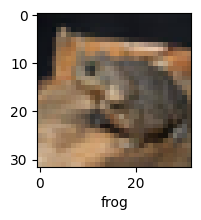

In [24]:
plot_sample(X_test, y_test, 71 )

In [25]:
classes[y_classes[2]]

'deer'